# Fine-tuned PaliGemma Inference

In this notebook we will see how to infer a PaliGemma fine-tuned model (using 🤗 transformers).

We need the latest version of transformers library.

In [1]:
!pip install -q -U transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 22.5 MB/s eta 0:00:00


Let's login to Hugging Face.

In [2]:
from huggingface_hub import notebook_login
notebook_login()

Let's load the model.

In [46]:
from transformers import AutoProcessor, PaliGemmaForConditionalGeneration

# model_id = "merve/paligemma_vqav2"
model_id = "eagle0504/paligemma_vqav2"
model = PaliGemmaForConditionalGeneration.from_pretrained(model_id)
processor = AutoProcessor.from_pretrained("google/paligemma-3b-pt-224")

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/862M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

We have fine-tuned the model on visual question answering (VQAv2). Hence, we will pass an image to the model and ask a question about it. Below is a rather challenging image for vision language models. Pretrained PaliGemma responds below image and question with "antique".

In [47]:
from PIL import Image
import requests


prompt = "what is behind the cat?"
image_file = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/cat.png?download=true"
raw_image = Image.open(requests.get(image_file, stream=True).raw)

![](https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/cat.png?download=true)

In [48]:
inputs = processor(prompt, raw_image.convert("RGB"), return_tensors="pt")
output = model.generate(**inputs, max_new_tokens=20)

In [49]:
processor.decode(output[0], skip_special_tokens=True)[len(prompt):]

'\ngramophone'

### Local file

In [50]:
import os

image_file = "deer_and_car.jpg"  # assume the file is in the same directory as your script

if os.path.exists(image_file):
    raw_image = Image.open(image_file)
else:
    image_file = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/cat.png?download=true"
    raw_image = Image.open(requests.get(image_file, stream=True).raw)

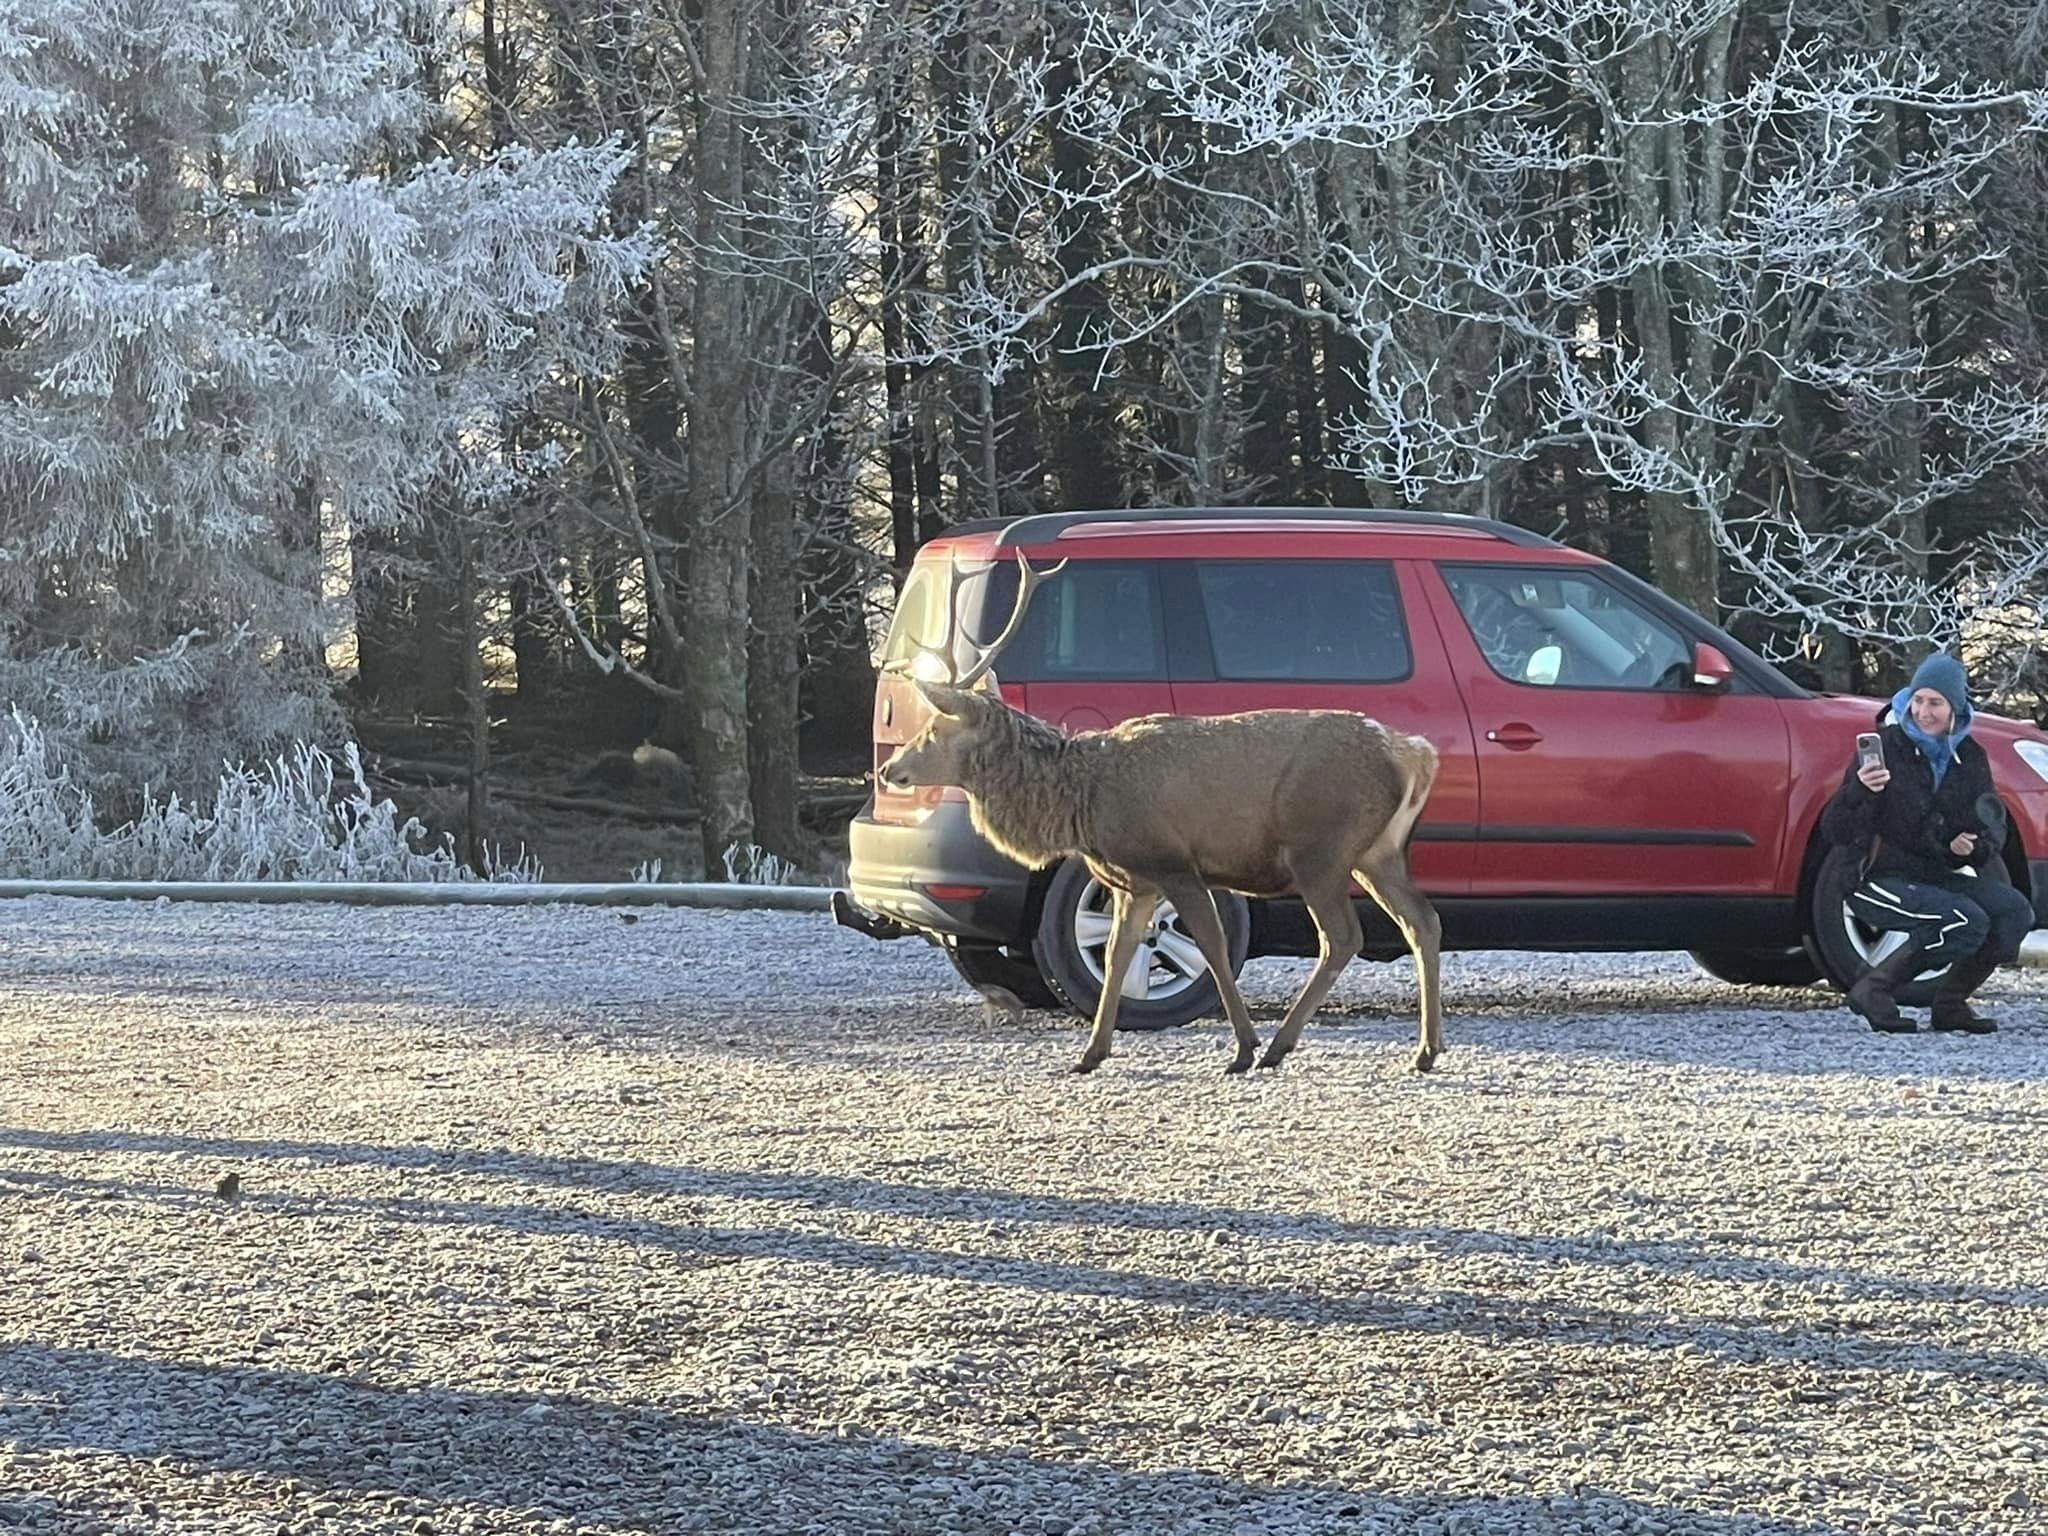

In [51]:
raw_image

In [52]:
prompt = "what color is the car behind the deer?"

In [53]:
inputs = processor(prompt, raw_image.convert("RGB"), return_tensors="pt")
output = model.generate(**inputs, max_new_tokens=20)
processor.decode(output[0], skip_special_tokens=True)[len(prompt):]

'\nred'

In [54]:
processor.decode(output[0], skip_special_tokens=True)

'what color is the car behind the deer?\nred'